## Part A: Preprocessing for region extraction
# Load and confirm images

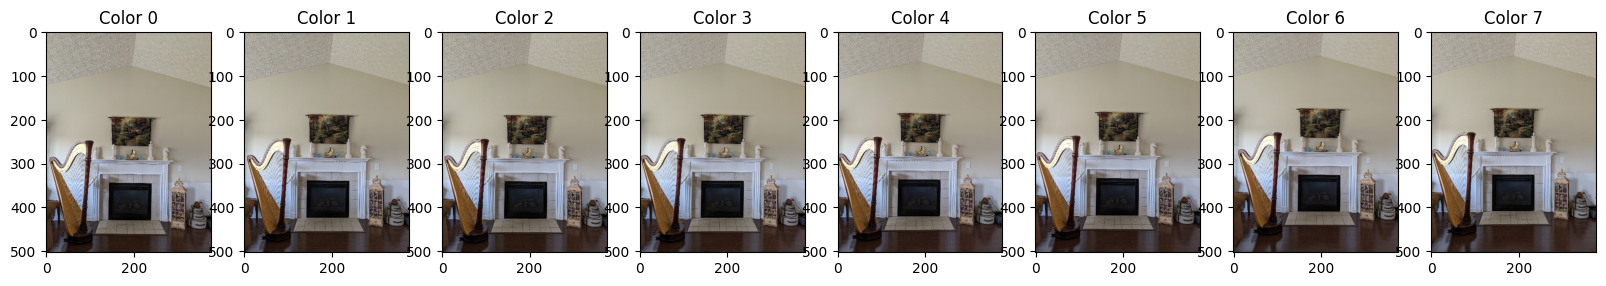

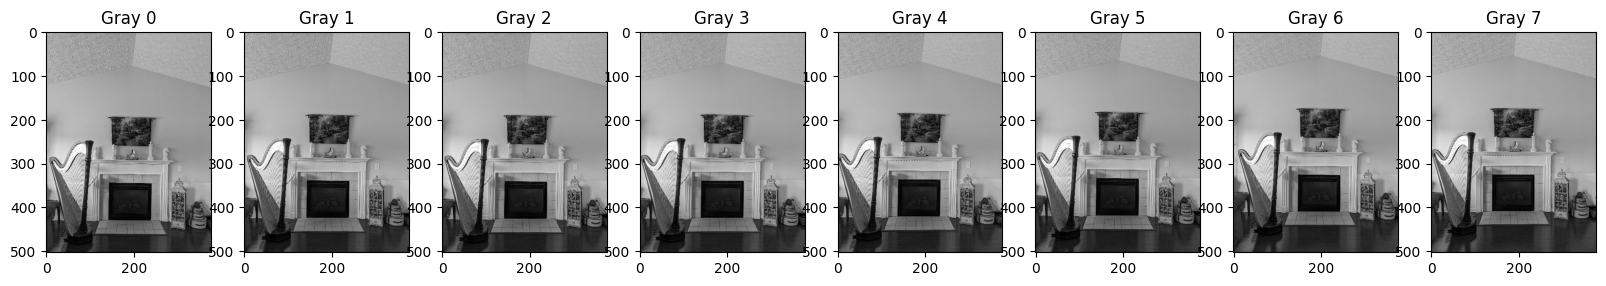

In [3]:
import skimage
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
import math
from scipy import ndimage

##Confirm image size usable
#N=3, R=4025, C=3017
#4025 = Q*8+1, Q=503
#3017 = M*8+1, M=377

# Import Images
imageList=[]
for i in range(8):
    imageList.append('./images/im%d.jpg' % i)
colorImages = []
grayscaleImages = []
for imageFile in imageList:
    # Import
    image = io.imread(imageFile)
    gray = io.imread(imageFile, as_gray=True)
    
    #Store
    colorImages.append(image)
    grayscaleImages.append(gray)


i=0
fig,axs = plt.subplots(1,8,figsize=(20,10))
for image in colorImages:

    axs[i].imshow(image) 
    axs[i].set_title("Color {}".format(i))
    i+=1   
plt.show()

i=0  
fig,axs = plt.subplots(1,8,figsize=(20,10))
for image in grayscaleImages:
    axs[i].imshow(image, cmap="gray") 
    axs[i].set_title("Gray {}".format(i))
    i+=1
plt.show()


# Step 2: Construct MEI

(503, 377)
(8, 503, 377)


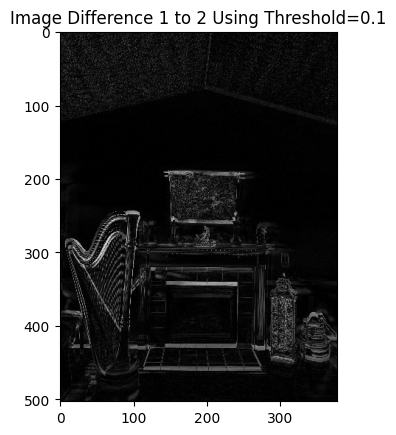

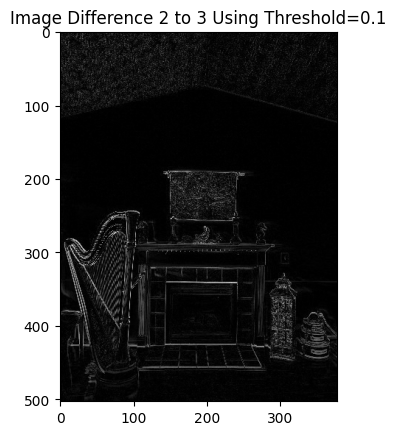

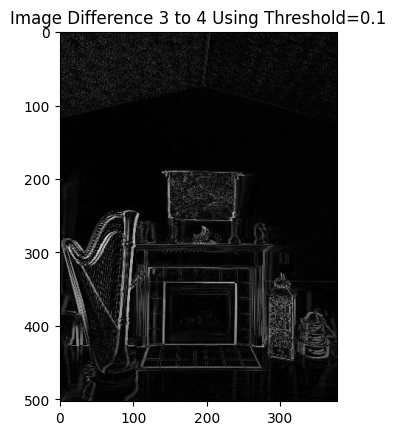

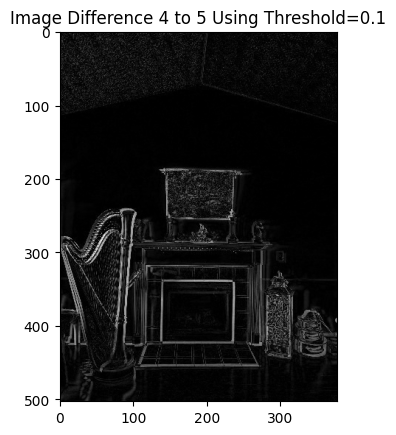

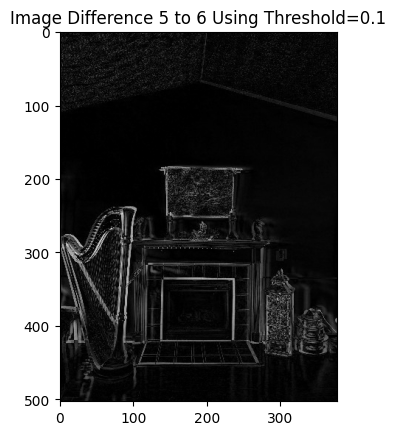

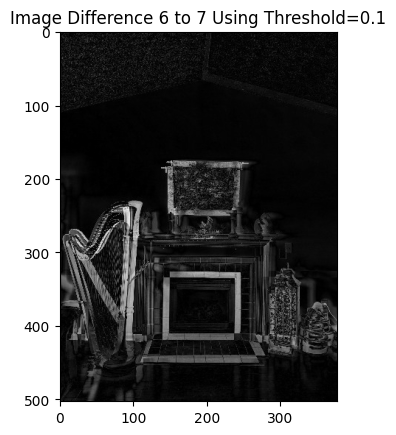

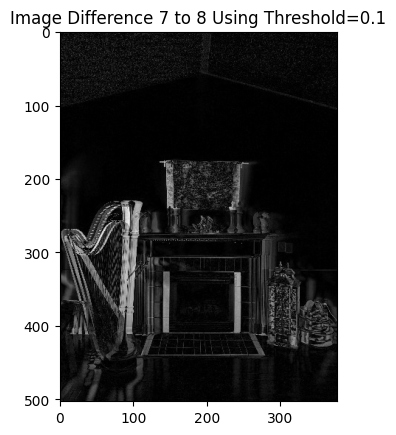

1.0


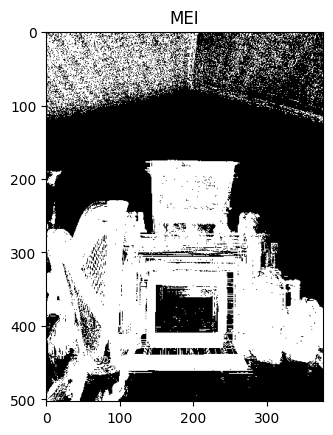

In [38]:
import numpy as np
## Get images in numpy array for MEI construction
print(np.shape(grayscaleImages[0]))
images = np.zeros((8,np.shape(grayscaleImages[0])[0],np.shape(grayscaleImages[0])[1]))
for i in range(8):
    images[i] = grayscaleImages[i]
print(np.shape(images))



motionEnergyImage = np.zeros(np.shape(grayscaleImages[0]))

threshold = .1
for i in range(1,8):
    imDif = abs(images[i,:,:]-images[i-1,:,:])
    imShape = np.shape(imDif)
    for row in range(imShape[0]):
        for column in range(imShape[1]):
            if imDif[row,column] > threshold:
                motionEnergyImage[row,column]=1
          
    plt.figure()
    plt.imshow(imDif, cmap='gray') 
    plt.title("Image Difference {} to {} Using Threshold={}".format(i,i+1,threshold))
    plt.show()

print(np.max(motionEnergyImage))

plt.figure()
plt.imshow(motionEnergyImage, cmap='gray') 
plt.title("MEI")
plt.show()

## Part B: Region Extraction